In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/water-pollution-and-disease/water_pollution_disease.csv


In [2]:
df = pd.read_csv("/kaggle/input/water-pollution-and-disease/water_pollution_disease.csv")
df.head()

,Country,Region,Year,Water Source Type,Contaminant Level (ppm),pH Level,Turbidity (NTU),Dissolved Oxygen (mg/L),Nitrate Level (mg/L),Lead Concentration (µg/L),...,"Cholera Cases per 100,000 people","Typhoid Cases per 100,000 people","Infant Mortality Rate (per 1,000 live births)",GDP per Capita (USD),Healthcare Access Index (0-100),Urbanization Rate (%),Sanitation Coverage (% of Population),Rainfall (mm per year),Temperature (°C),Population Density (people per km²)
0,Mexico,North,2015,Lake,6.06,7.12,3.93,4.28,8.28,7.89,...,33,44,76.16,57057,96.92,84.61,63.23,2800,4.94,593
1,Brazil,West,2017,Well,5.24,7.84,4.79,3.86,15.74,14.68,...,27,8,77.30,17220,84.73,73.37,29.12,1572,16.93,234
2,Indonesia,Central,2022,Pond,0.24,6.43,0.79,3.42,36.67,9.96,...,39,50,48.45,86022,58.37,72.86,93.56,2074,21.73,57
3,Nigeria,East,2016,Well,7.91,6.71,1.96,3.12,36.92,6.77,...,33,13,95.66,31166,39.07,71.07,94.25,937,3.79,555
4,Mexico,South,2005,Well,0.12,8.16,4.22,9.15,49.35,12.51,...,31,68,58.78,25661,23.03,55.55,69.23,2295,31.44,414


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Country                                        3000 non-null   object 
 1   Region                                         3000 non-null   object 
 2   Year                                           3000 non-null   int64  
 3   Water Source Type                              3000 non-null   object 
 4   Contaminant Level (ppm)                        3000 non-null   float64
 5   pH Level                                       3000 non-null   float64
 6   Turbidity (NTU)                                3000 non-null   float64
 7   Dissolved Oxygen (mg/L)                        3000 non-null   float64
 8   Nitrate Level (mg/L)                           3000 non-null   float64
 9   Lead Concentration (µg/L)                      3000 

In [4]:
df.isnull().sum()

Country                                            0
Region                                             0
Year                                               0
Water Source Type                                  0
Contaminant Level (ppm)                            0
pH Level                                           0
Turbidity (NTU)                                    0
Dissolved Oxygen (mg/L)                            0
Nitrate Level (mg/L)                               0
Lead Concentration (µg/L)                          0
Bacteria Count (CFU/mL)                            0
Water Treatment Method                           747
Access to Clean Water (% of Population)            0
Diarrheal Cases per 100,000 people                 0
Cholera Cases per 100,000 people                   0
Typhoid Cases per 100,000 people                   0
Infant Mortality Rate (per 1,000 live births)      0
GDP per Capita (USD)                               0
Healthcare Access Index (0-100)               

In [5]:
df.duplicated().sum()

0

In [6]:
df['Water Treatment Method'].value_counts(dropna=False)

Water Treatment Method
Boiling         777
Chlorination    748
NaN             747
Filtration      728
Name: count, dtype: int64

In [7]:
df['Water Treatment Method'].fillna('Unkown', inplace=True)

df.isnull().sum()

<ipython-input-7-a0bc99c966b0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Water Treatment Method'].fillna('Unkown', inplace=True)


Country                                          0
Region                                           0
Year                                             0
Water Source Type                                0
Contaminant Level (ppm)                          0
pH Level                                         0
Turbidity (NTU)                                  0
Dissolved Oxygen (mg/L)                          0
Nitrate Level (mg/L)                             0
Lead Concentration (µg/L)                        0
Bacteria Count (CFU/mL)                          0
Water Treatment Method                           0
Access to Clean Water (% of Population)          0
Diarrheal Cases per 100,000 people               0
Cholera Cases per 100,000 people                 0
Typhoid Cases per 100,000 people                 0
Infant Mortality Rate (per 1,000 live births)    0
GDP per Capita (USD)                             0
Healthcare Access Index (0-100)                  0
Urbanization Rate (%)          

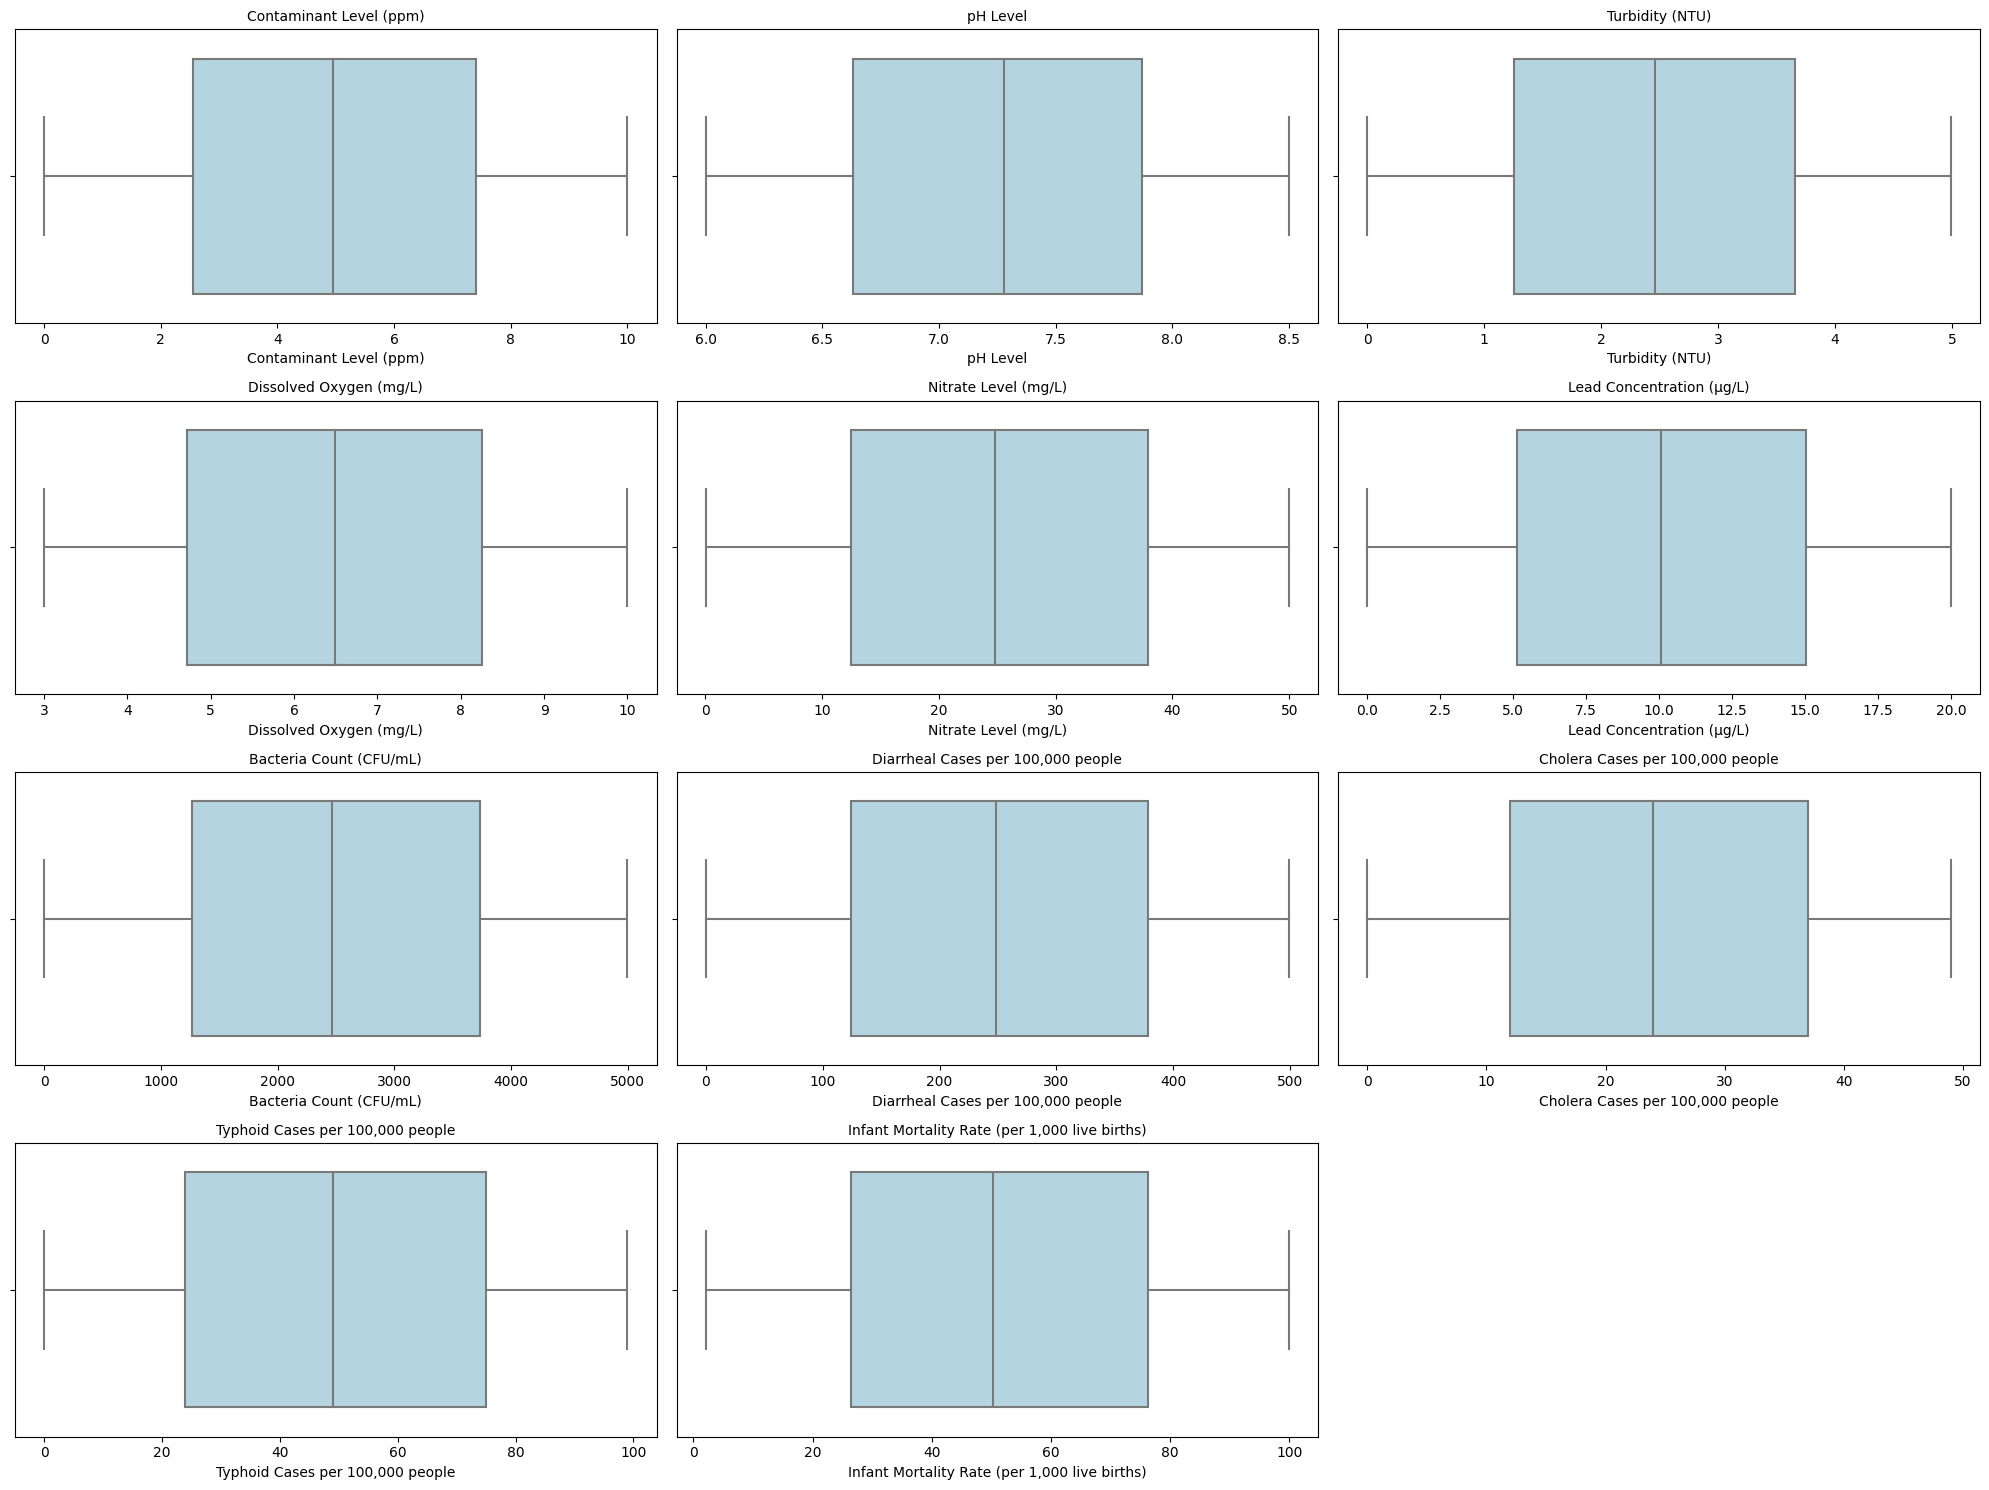

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric features to check for outliers
numeric_cols = [
    'Contaminant Level (ppm)', 'pH Level', 'Turbidity (NTU)',
    'Dissolved Oxygen (mg/L)', 'Nitrate Level (mg/L)',
    'Lead Concentration (µg/L)', 'Bacteria Count (CFU/mL)',
    'Diarrheal Cases per 100,000 people', 'Cholera Cases per 100,000 people',
    'Typhoid Cases per 100,000 people', 'Infant Mortality Rate (per 1,000 live births)'
]

# Boxplots to visualize outliers
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(col, fontsize=10)
    plt.tight_layout()
plt.show()


In [9]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 *IQR
    upper_bound = Q3 + 1.5 *IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df_clean = df.copy()

for col in numeric_cols:
    df_clean = remove_outliers_iqr(df_clean, col)

print("Original Shape: ", df.shape)
print("Cleaned Shape: ", df_clean.shape)

Original Shape:  (3000, 24)
Cleaned Shape:  (3000, 24)


In [10]:
for col in numeric_cols:
    before = df_clean.shape[0]
    df_clean = remove_outliers_iqr(df_clean, col)
    after = df_clean.shape[0]
    print(f"{col}: {before - after} rows removed")


Contaminant Level (ppm): 0 rows removed
pH Level: 0 rows removed
Turbidity (NTU): 0 rows removed
Dissolved Oxygen (mg/L): 0 rows removed
Nitrate Level (mg/L): 0 rows removed
Lead Concentration (µg/L): 0 rows removed
Bacteria Count (CFU/mL): 0 rows removed
Diarrheal Cases per 100,000 people: 0 rows removed
Cholera Cases per 100,000 people: 0 rows removed
Typhoid Cases per 100,000 people: 0 rows removed
Infant Mortality Rate (per 1,000 live births): 0 rows removed


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


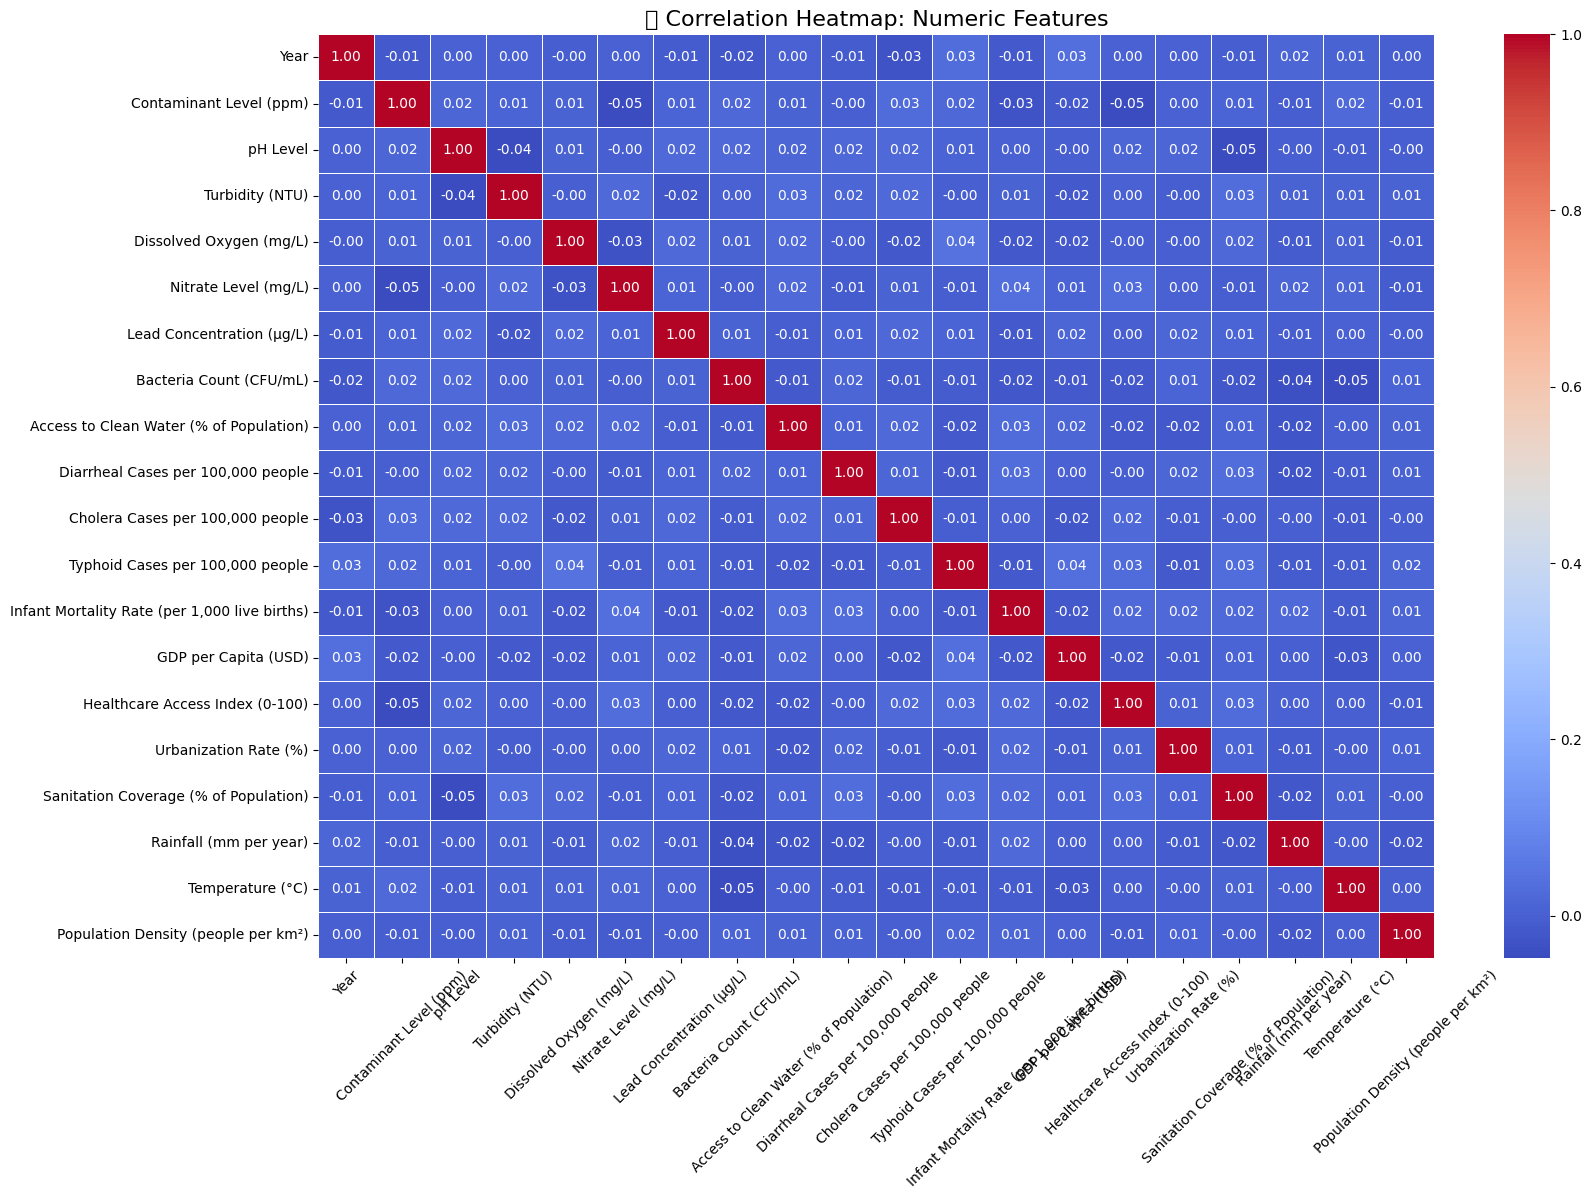

In [11]:
corr = df_clean.select_dtypes(include=np.number).corr()

# Plot
plt.figure(figsize=(18, 12))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("📊 Correlation Heatmap: Numeric Features", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128167 (\N{DROPLET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128118 (\N{BABY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


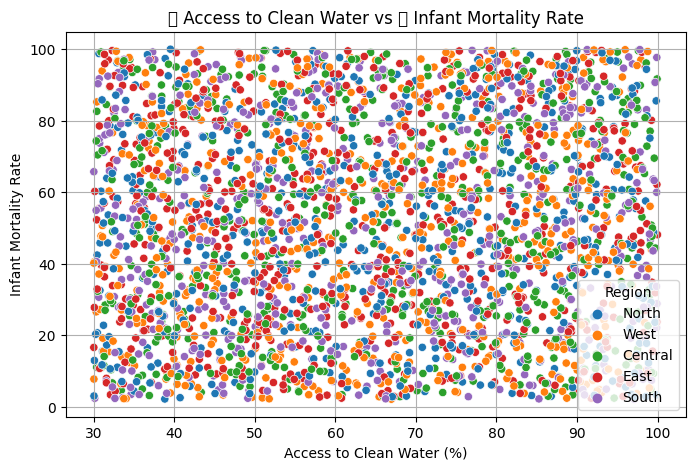

In [12]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df_clean,
    x='Access to Clean Water (% of Population)',
    y='Infant Mortality Rate (per 1,000 live births)',
    hue='Region'
)
plt.title('💧 Access to Clean Water vs 👶 Infant Mortality Rate')
plt.xlabel('Access to Clean Water (%)')
plt.ylabel('Infant Mortality Rate')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129388 (\N{LEAFY GREEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128169 (\N{PILE OF POO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


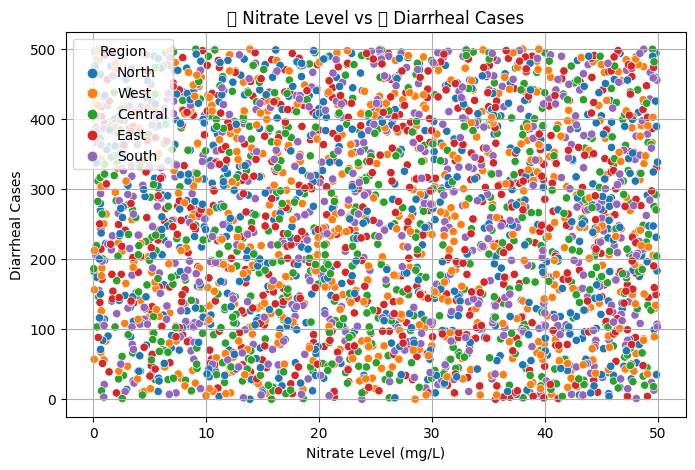

In [13]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df_clean,
    x='Nitrate Level (mg/L)',
    y='Diarrheal Cases per 100,000 people',
    hue='Region'
)
plt.title('🥬 Nitrate Level vs 💩 Diarrheal Cases')
plt.xlabel('Nitrate Level (mg/L)')
plt.ylabel('Diarrheal Cases')
plt.grid(True)
plt.show()

<ipython-input-14-b301e943c794>:18: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


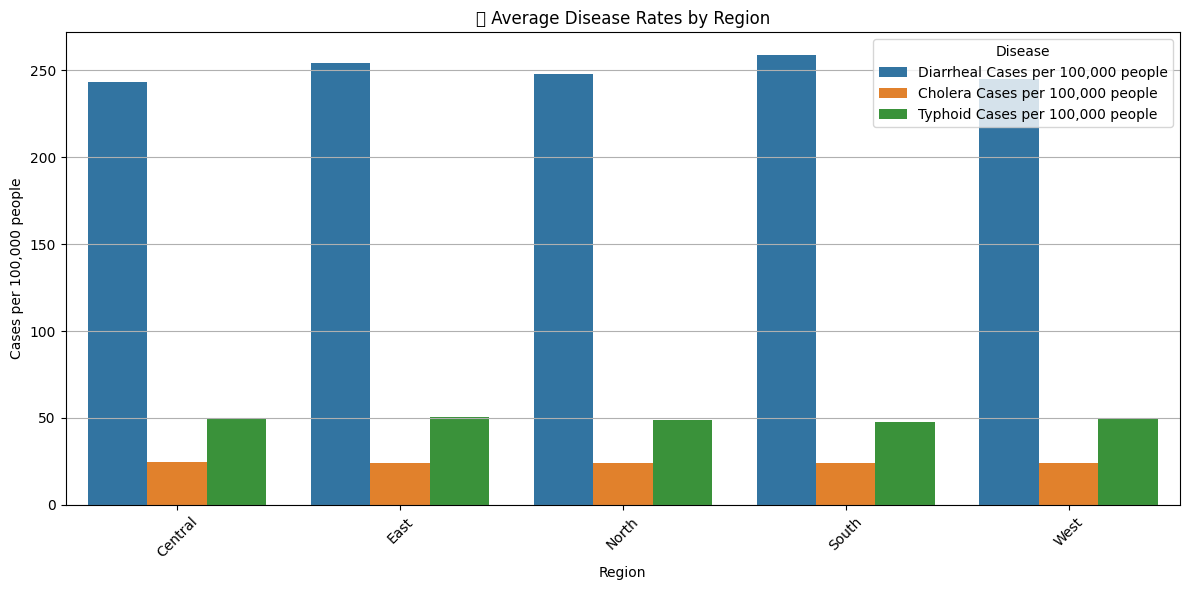

In [14]:
region_diseases = df_clean.groupby('Region')[[
    'Diarrheal Cases per 100,000 people',
    'Cholera Cases per 100,000 people',
    'Typhoid Cases per 100,000 people'
]].mean().reset_index()



region_diseases_melted = region_diseases.melt(id_vars='Region', var_name='Disease', value_name='Rate')

plt.figure(figsize=(12, 6))
sns.barplot(data=region_diseases_melted, x='Region', y='Rate', hue='Disease')
plt.title('📍 Average Disease Rates by Region')
plt.ylabel('Cases per 100,000 people')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Disease')
plt.tight_layout()
plt.show()

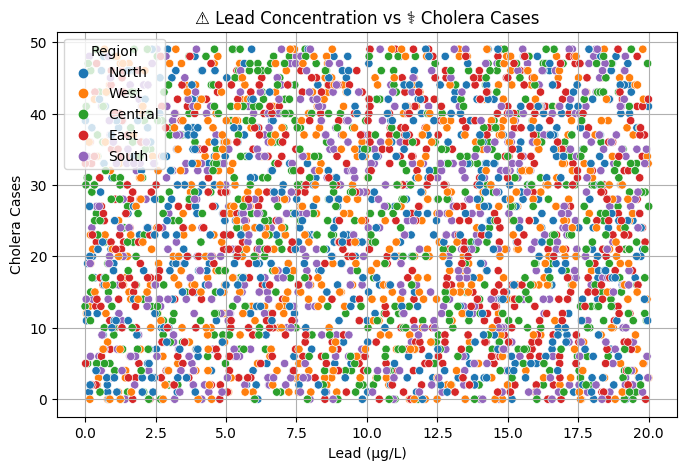

In [15]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df_clean,
    x='Lead Concentration (µg/L)',
    y='Cholera Cases per 100,000 people',
    hue='Region'
)
plt.title('⚠️ Lead Concentration vs ⚕️ Cholera Cases')
plt.xlabel('Lead (µg/L)')
plt.ylabel('Cholera Cases')
plt.grid(True)
plt.show()

In [16]:
# Create a composite pollution index
df_clean['Pollution Index'] = (
    df_clean['Contaminant Level (ppm)'] +
    df_clean['Nitrate Level (mg/L)'] +
    df_clean['Lead Concentration (µg/L)'] +
    df_clean['Bacteria Count (CFU/mL)'] / 1000  # scale down
)


In [17]:
df_clean['Disease Burden'] = (
    df_clean['Diarrheal Cases per 100,000 people'] +
    df_clean['Cholera Cases per 100,000 people'] +
    df_clean['Typhoid Cases per 100,000 people']
)


In [18]:
df_clean.head()

,Country,Region,Year,Water Source Type,Contaminant Level (ppm),pH Level,Turbidity (NTU),Dissolved Oxygen (mg/L),Nitrate Level (mg/L),Lead Concentration (µg/L),...,"Infant Mortality Rate (per 1,000 live births)",GDP per Capita (USD),Healthcare Access Index (0-100),Urbanization Rate (%),Sanitation Coverage (% of Population),Rainfall (mm per year),Temperature (°C),Population Density (people per km²),Pollution Index,Disease Burden
0,Mexico,North,2015,Lake,6.06,7.12,3.93,4.28,8.28,7.89,...,76.16,57057,96.92,84.61,63.23,2800,4.94,593,25.574,549
1,Brazil,West,2017,Well,5.24,7.84,4.79,3.86,15.74,14.68,...,77.30,17220,84.73,73.37,29.12,1572,16.93,234,37.782,157
2,Indonesia,Central,2022,Pond,0.24,6.43,0.79,3.42,36.67,9.96,...,48.45,86022,58.37,72.86,93.56,2074,21.73,57,49.200,363
3,Nigeria,East,2016,Well,7.91,6.71,1.96,3.12,36.92,6.77,...,95.66,31166,39.07,71.07,94.25,937,3.79,555,55.379,49
4,Mexico,South,2005,Well,0.12,8.16,4.22,9.15,49.35,12.51,...,58.78,25661,23.03,55.55,69.23,2295,31.44,414,66.162,565


In [19]:
df_clean['Is Urbanized'] = df_clean['Urbanization Rate (%)'].apply(lambda x: 1 if x >= 70 else 0)


In [20]:
df_encoded = pd.get_dummies(df_clean, columns=[
    'Region',
    'Water Source Type',
    'Water Treatment Method'
], drop_first=True)


In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded['Country_Encoded'] = le.fit_transform(df_clean['Country'])
df_encoded.drop(columns='Country', inplace=True)


In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols_to_scale = ['Pollution Index', 'GDP per Capita (USD)', 'Healthcare Access Index (0-100)', 
                 'Sanitation Coverage (% of Population)', 'Access to Clean Water (% of Population)']

df_encoded[cols_to_scale] = scaler.fit_transform(df_encoded[cols_to_scale])


In [23]:
print("✅ Final dataset shape:", df_encoded.shape)
df_encoded.head()


✅ Final dataset shape: (3000, 36)


,Year,Contaminant Level (ppm),pH Level,Turbidity (NTU),Dissolved Oxygen (mg/L),Nitrate Level (mg/L),Lead Concentration (µg/L),Bacteria Count (CFU/mL),Access to Clean Water (% of Population),"Diarrheal Cases per 100,000 people",...,Region_West,Water Source Type_Pond,Water Source Type_River,Water Source Type_Spring,Water Source Type_Tap,Water Source Type_Well,Water Treatment Method_Chlorination,Water Treatment Method_Filtration,Water Treatment Method_Unkown,Country_Encoded
0,2015,6.06,7.12,3.93,4.28,8.28,7.89,3344,0.051300,472,...,False,False,False,False,False,False,False,True,False,6
1,2017,5.24,7.84,4.79,3.86,15.74,14.68,2122,0.850672,122,...,True,False,False,False,False,True,False,False,False,1
2,2022,0.24,6.43,0.79,3.42,36.67,9.96,2330,0.075450,274,...,False,True,False,False,False,False,False,False,True,5
3,2016,7.91,6.71,1.96,3.12,36.92,6.77,3779,0.393255,3,...,False,False,False,False,False,True,False,False,False,7
4,2005,0.12,8.16,4.22,9.15,49.35,12.51,4182,0.094170,466,...,False,False,False,False,False,True,False,True,False,6


In [24]:
X = df_encoded.drop(columns=['Disease Burden']) 
y = df_encoded['Disease Burden']

In [25]:
from sklearn.model_selection import train_test_split

# Features (already cleaned) and target
X = df_encoded.drop(columns=[
    'Disease Burden',
    'Diarrheal Cases per 100,000 people',
    'Cholera Cases per 100,000 people',
    'Typhoid Cases per 100,000 people'
])
y = df_encoded['Diarrheal Cases per 100,000 people']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)


In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(y_true, y_pred, model_name):
    print(f"📊 {model_name} Evaluation")
    print("R² Score:", round(r2_score(y_true, y_pred), 3))
    print("MAE:", round(mean_absolute_error(y_true, y_pred), 2))
    print("RMSE:", round(np.sqrt(mean_squared_error(y_true, y_pred)), 2))
    print("-" * 30)

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")


📊 Linear Regression Evaluation
R² Score: -0.014
MAE: 128.36
RMSE: 146.83
------------------------------
📊 Random Forest Evaluation
R² Score: -0.037
MAE: 129.42
RMSE: 148.44
------------------------------
📊 XGBoost Evaluation
R² Score: -0.186
MAE: 133.46
RMSE: 158.77
------------------------------


In [28]:
# Create a binary label
df_encoded['High Risk'] = df_encoded['Diarrheal Cases per 100,000 people'].apply(lambda x: 1 if x > 150 else 0)

# Redefine target
y = df_encoded['High Risk']
X = df_encoded.drop(columns=[
    'High Risk',
    'Disease Burden',
    'Diarrheal Cases per 100,000 people',
    'Cholera Cases per 100,000 people',
    'Typhoid Cases per 100,000 people'
])



In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


✅ Accuracy: 0.005
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         1
         

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [30]:

df_encoded['High Risk'] = df_encoded['Diarrheal Cases per 100,000 people'].apply(lambda x: 1 if x > 150 else 0)

# Features and target
X = df_encoded.drop(columns=[
    'High Risk',
    'Disease Burden',
    'Diarrheal Cases per 100,000 people',
    'Cholera Cases per 100,000 people',
    'Typhoid Cases per 100,000 people'
])
y = df_encoded['High Risk']


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train-test split again
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluate
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


✅ Accuracy: 0.6866666666666666
              precision    recall  f1-score   support

           0       0.33      0.03      0.05       183
           1       0.70      0.98      0.81       417

    accuracy                           0.69       600
   macro avg       0.51      0.50      0.43       600
weighted avg       0.59      0.69      0.58       600



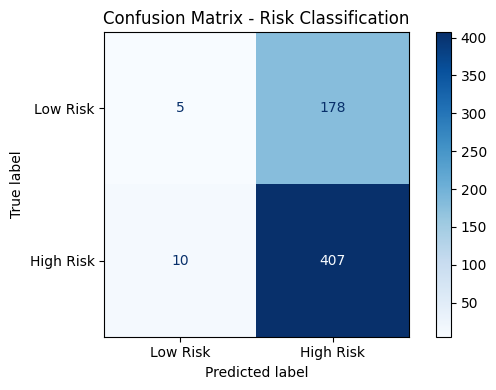

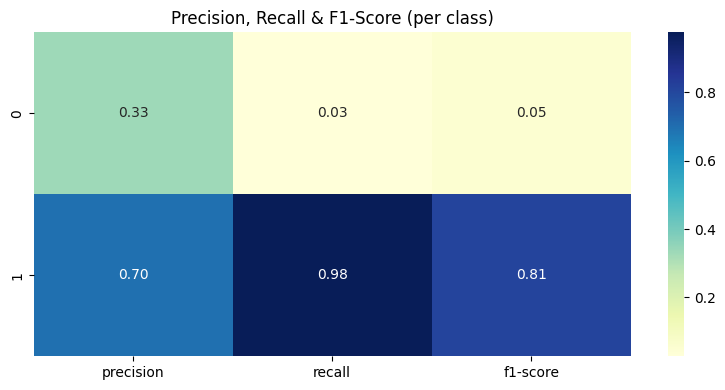

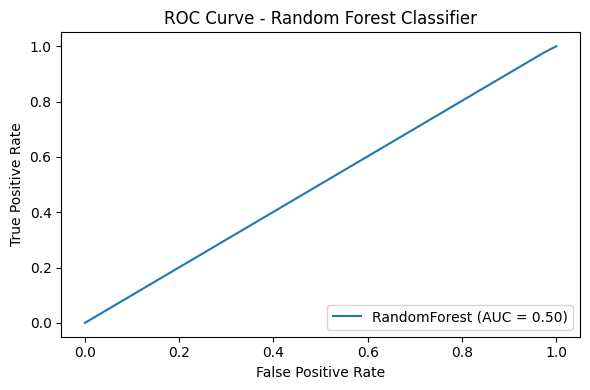

In [32]:

from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report,
    roc_curve, auc, RocCurveDisplay
)

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
fig_cm, ax_cm = plt.subplots(figsize=(6, 4))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low Risk", "High Risk"]).plot(ax=ax_cm, cmap="Blues")
ax_cm.set_title("Confusion Matrix - Risk Classification")
plt.tight_layout()
fig_cm.savefig("confusion_matrix.png")
plt.show()

# 2. Classification Report as Heatmap
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

fig_cr, ax_cr = plt.subplots(figsize=(8, 4))
sns.heatmap(report_df.iloc[:2, :-1], annot=True, cmap="YlGnBu", fmt=".2f", ax=ax_cr)
ax_cr.set_title("Precision, Recall & F1-Score (per class)")
plt.tight_layout()
fig_cr.savefig("classification_report_heatmap.png")
plt.show()

# 3. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

fig_roc, ax_roc = plt.subplots(figsize=(6, 4))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="RandomForest").plot(ax=ax_roc)
ax_roc.set_title("ROC Curve - Random Forest Classifier")
plt.tight_layout()
fig_roc.savefig("roc_curve.png")
plt.show()
